# Objective 1: Using the Pandas library
## Variable Description:
- src: Source
- df: dataframe
Functions:
- pandas:
    - read_csv(): Read a csv file from local/web.
    - read_\[format\]()
- df (dataframe):
    - info(): Show basic info (range, columns).
    - head(): Print the first few (5) rows.
    - head(8): Print the first 8 rows.
    - tail(): Print the last few (5) rows.
    - tail(12): Print the last 12 rows.
    - describe(): Show a basic description of the dataset (count, mean, standard deviation, min value, max valuem etc.)
    - drop(): Drop data from the database
        - \['title1','title2'\] or 'title': Rows/Columns to drop.
        - axis: 0 for rows, 1 for columns
        - inplace: true for replacing original dataframe with new one, false for creating a new dataframe
    - rename()
        - columns={'old_name':'new_name'}
        - inplace=True/False
    - ['column']: Display data in that column

In [18]:
# Exercise 1
# Steps: Read data from a source, then put it to the dataframe
import pandas
import seaborn
import matplotlib.pyplot as plt
import plotly.express as px
src="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv"
df = pandas.read_csv(src)
# df.drop(['FIPS','Admin2','Province_State','Combined_Key','Country_Region','Last_Update'],axis=1,inplace=True)
df.rename(columns={'Country_Region':'Country'},inplace=True)
df.info()
# Create a separate dataset with the filtered info
world = df.groupby("Country")[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
world.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country              4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,52513,8585,41727,2201
1,Albania,58316,23501,33634,1181
2,Algeria,99897,29740,67395,2762
3,Andorra,8117,570,7463,84
4,Angola,17568,6017,11146,405


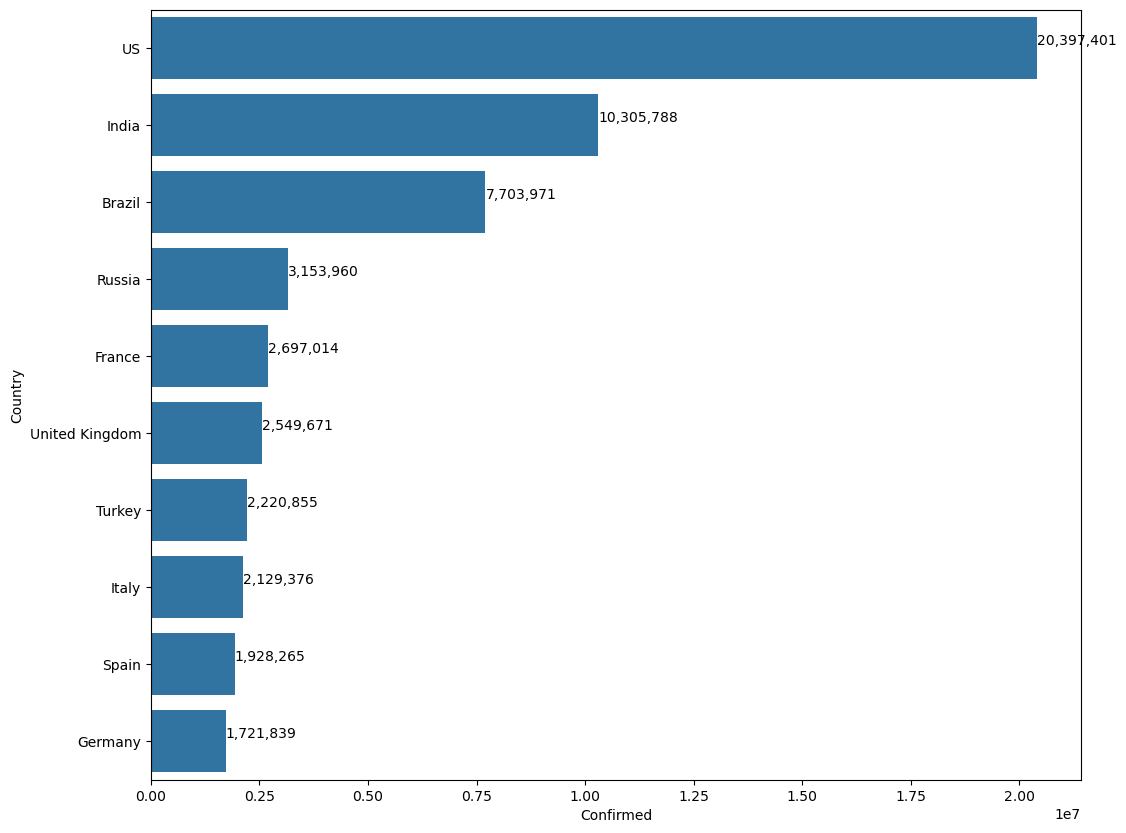

In [ ]:
# Generate a bar graph listing the top 20 affected countries.
top_10=world.sort_values(by='Confirmed',ascending=False).head(10)
plt.figure(figsize=(12,10))
plot = seaborn.barplot(x=top_10['Confirmed'], y=top_10['Country'])
# enumerate: gets both the index & key from a list object (or other).
for i,(value,name) in enumerate(zip(top_10['Confirmed'],top_10['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()